In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


2024-05-15 23:47:31.019440: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 23:47:31.515707: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Num GPUs Available:  1


2024-05-15 23:47:32.148410: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-15 23:47:32.164663: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-15 23:47:32.164860: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

# загружаем датасет и подготавливаем

In [2]:
from keras.src.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


In [3]:
import skimage.data
import numpy as np
import skimage.transform

x_train = np.array([skimage.transform.resize(image, (32, 32)) for image in x_train])


# Инициализируем модель

In [4]:
from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50(classes=10, weights=None, input_shape=(32, 32, 1))

model.summary()

2024-05-15 23:47:37.349579: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-15 23:47:37.349800: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-15 23:47:37.349959: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 1) │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      3,200 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 23,601,930 (90.03 MB)

 Trainable params: 23,548,810 (89.83 MB)

 Non-trainable params: 53,120 (207.50 KB)

# Обучаем

In [5]:
BATCH_SIZE=10
EPOCHS = 10

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=1)

Epoch 1/10


2024-05-15 23:47:38.201750: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 196608000 exceeds 10% of free system memory.
2024-05-15 23:47:38.338649: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 196608000 exceeds 10% of free system memory.
I0000 00:00:1715806074.054265    9558 service.cc:145] XLA service 0x791ec0004eb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715806074.054281    9558 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti, Compute Capability 8.9
2024-05-15 23:47:54.612236: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-15 23:47:56.476756: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1715806077.617166    9796 asm_compiler.cc:369] ptxas warning : Registers are spilled to

  11/4800 ━━━━━━━━━━━━━━━━━━━━ 51s 11ms/step - accuracy: 0.0553 - loss: 5.0630

I0000 00:00:1715806084.010086    9558 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4795/4800 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4832 - loss: 1.5792

2024-05-15 23:48:51.531924: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 49152000 exceeds 10% of free system memory.
2024-05-15 23:48:51.551914: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 49152000 exceeds 10% of free system memory.


4800/4800 ━━━━━━━━━━━━━━━━━━━━ 78s 11ms/step - accuracy: 0.4832 - loss: 1.5789 - val_accuracy: 0.4642 - val_loss: 3.0010
Epoch 2/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 51s 11ms/step - accuracy: 0.5080 - loss: 1.1879 - val_accuracy: 0.5438 - val_loss: 4.1014
Epoch 3/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 53s 11ms/step - accuracy: 0.6288 - loss: 0.6681 - val_accuracy: 0.6436 - val_loss: 0.8709
Epoch 4/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 50s 11ms/step - accuracy: 0.6654 - loss: 0.5157 - val_accuracy: 0.6872 - val_loss: 0.4244
Epoch 5/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - accuracy: 0.6912 - loss: 0.4233 - val_accuracy: 0.6997 - val_loss: 0.3668
Epoch 6/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 55s 11ms/step - accuracy: 0.7001 - loss: 0.3750 - val_accuracy: 0.6879 - val_loss: 0.3962
Epoch 7/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 54s 11ms/step - accuracy: 0.6991 - loss: 0.3695 - val_accuracy: 0.6688 - val_loss: 1.8359
Epoch 8/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - accuracy: 0.7170 - loss: 0.32

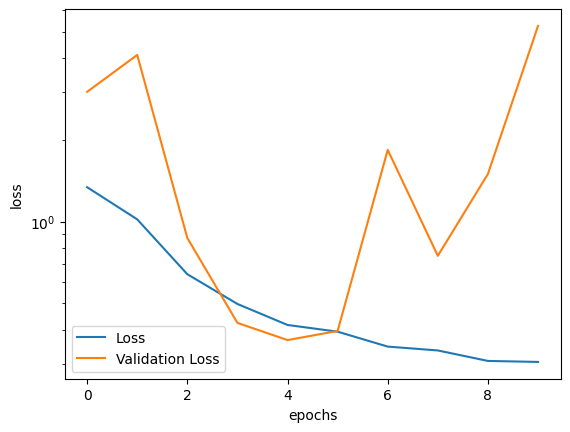

In [6]:
import matplotlib.pyplot as plt

plt.xlabel('epochs')
plt.ylabel('loss')

plt.yscale('log')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])

# Прогоняем на тестовых данных

In [7]:
x_test = np.array([skimage.transform.resize(image, (32, 32)) for image in x_test])
model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)

  57/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6502 - loss: 7.8756

2024-05-15 23:56:50.542792: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 40960000 exceeds 10% of free system memory.


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6644 - loss: 5.9202


[5.764836311340332, 0.6664000153541565]

In [13]:
LABEL_NAMES = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

predictions = model.predict(x_test[:10])
for i, (expected, predicted) in enumerate(zip(y_test[:10], predictions)):
    print(f'ожидали {LABEL_NAMES[expected]} ({expected}), получили {LABEL_NAMES[np.argmax(predicted)]} ({np.argmax(predicted)})')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
ожидали ankle_boots (9), получили ankle_boots (9)
ожидали pullover (2), получили pullover (2)
ожидали trouser (1), получили trouser (1)
ожидали trouser (1), получили trouser (1)
ожидали shirt (6), получили shirt (6)
ожидали trouser (1), получили trouser (1)
ожидали coat (4), получили coat (4)
ожидали shirt (6), получили shirt (6)
ожидали sandal (5), получили sandal (5)
ожидали sneaker (7), получили ankle_boots (9)
